In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:

# Step 1: Load the Dataset
# Load the dataset into a DataFrame
data_path = r'D:\school\HETIC\PYTHON\Machine_learning\Projet de fin de module\Dataset_Abandon_Scolaire.csv'  # Update with the correct path
df = pd.read_csv(data_path)
df.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


In [46]:
# Step 2: Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (example: fill with mean or drop)
#df.fillna(df.mean(), inplace=True)  # Example: filling missing values with mean

# Check for duplicates
duplicates = df.duplicated().sum()
print("\n")
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check data types
print("\n")

print("Data types of each column:\n", df.dtypes)

# Convert data types if necessary (example: converting a column to category)
# df['column_name'] = df['column_name'].astype('category')


Missing values in each column:
 Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64


Number of duplicate rows: 0


Data types of each column:
 Age                      int64
Sexe                    object
Taux_presence          float64
Nombre_retards           int64
Note_moyenne           float64
Situation_familiale     object
Abandon                  int64
dtype: object


In [47]:
# Create a figure for categorical analysis
plt.figure(figsize=(15, 10))

# Plot categorical columns with value counts
categorical_cols = df.select_dtypes(include=['object']).columns


# Create detailed summary tables
print("\n=== Detailed Categorical Analysis ===")
for column in categorical_cols:
    print(f"\n{'-'*50}")
    print(f"Analysis for {column}:")
    print(f"{'-'*50}")
    
    # Value counts with percentages
    value_counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    
    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages.round(2)
    })
    print("\nValue Distribution:")
    print(summary_df)
    
    # Additional statistics
    print(f"\nTotal unique values: {len(value_counts)}")
    print(f"Most common value: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences)")
    print(f"Least common value: {value_counts.index[-1]} ({value_counts.iloc[-1]} occurrences)")

# Create a figure for numeric analysis
plt.figure(figsize=(15, 10))

# Plot numeric columns distributions
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Create detailed numeric summary
print("\n=== Detailed Numeric Analysis ===")
numeric_stats = df.describe()
print("\nBasic Statistics:")
print(numeric_stats)

# Add additional numeric analysis
print("\nDetailed Numeric Analysis:")
for column in numeric_cols:
    print(f"\n{'-'*50}")
    print(f"Analysis for {column}:")
    print(f"{'-'*50}")
    
    # Calculate additional statistics
    stats = {
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Mode': df[column].mode().iloc[0],
        'Std Dev': df[column].std(),
        'Variance': df[column].var(),
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurtosis()
    }
    
    # Create a formatted summary
    summary_df = pd.DataFrame.from_dict(stats, orient='index', columns=['Value'])
    print("\nStatistical Summary:")
    print(summary_df.round(4))
    
    # Outlier analysis
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    print(f"\nOutlier Analysis:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    if len(outliers) > 0:
        print("Outlier values:")
        print(outliers.sort_values().to_frame())




=== Detailed Categorical Analysis ===

--------------------------------------------------
Analysis for Sexe:
--------------------------------------------------

Value Distribution:
       Count  Percentage
Sexe                    
Homme   1011       50.55
Femme    989       49.45

Total unique values: 2
Most common value: Homme (1011 occurrences)
Least common value: Femme (989 occurrences)

--------------------------------------------------
Analysis for Situation_familiale:
--------------------------------------------------

Value Distribution:
                     Count  Percentage
Situation_familiale                   
Célibataire           1014       50.70
Marié                  571       28.55
Enfants à charge       302       15.10
Divorcé                113        5.65

Total unique values: 4
Most common value: Célibataire (1014 occurrences)
Least common value: Divorcé (113 occurrences)

=== Detailed Numeric Analysis ===

Basic Statistics:
             Age  Taux_presence  Nombre_

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   object 
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   object 
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 109.5+ KB


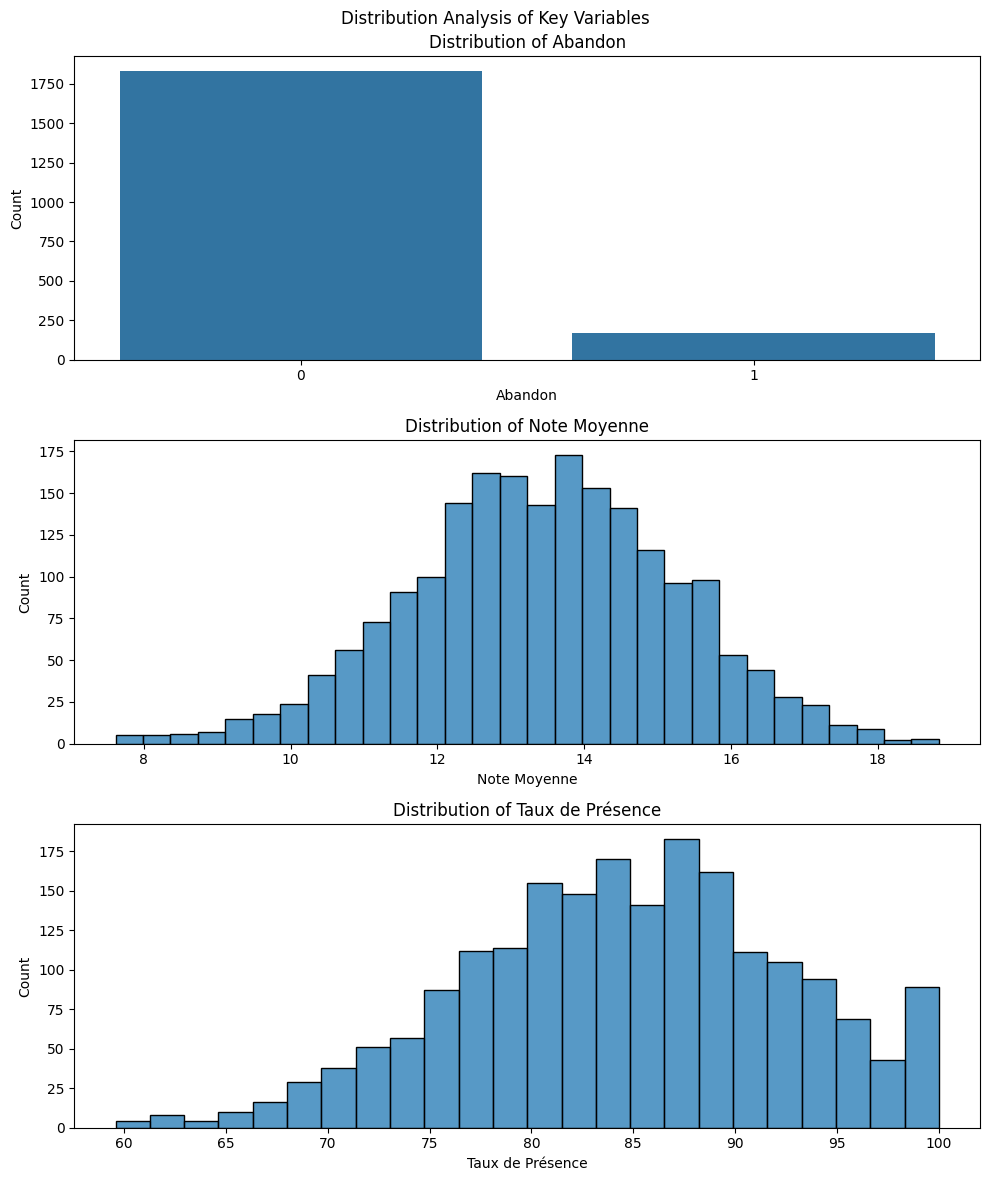

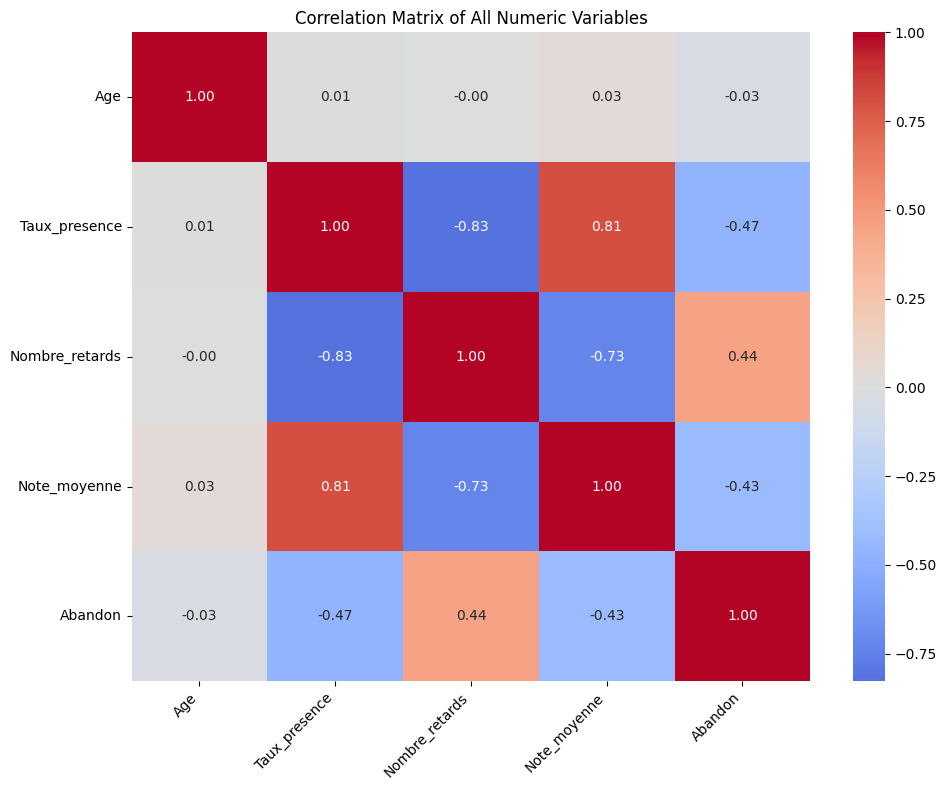

In [49]:

# Step 3: Exploratory Data Analysis (EDA)
# Basic statistics for specific columns

# Create a figure with 3 subplots for the specific distributions
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle('Distribution Analysis of Key Variables')

# Plot 1: Distribution of Abandon
sns.countplot(data=df, x=df['Abandon'], ax=axes[0])
axes[0].set_title('Distribution of Abandon')
axes[0].set_xlabel('Abandon')
axes[0].set_ylabel('Count')

# Plot 2: Distribution of Note_moyenne
sns.histplot(data=df, x='Note_moyenne', ax=axes[1])
axes[1].set_title('Distribution of Note Moyenne')
axes[1].set_xlabel('Note Moyenne')
axes[1].set_ylabel('Count')

# Plot 3: Distribution of Taux_presence
sns.histplot(data=df, x='Taux_presence', ax=axes[2])
axes[2].set_title('Distribution of Taux de Présence')
axes[2].set_xlabel('Taux de Présence')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()
# Create a correlation heatmap for all variables
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of All Numeric Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Après analyse de la matrice de corrélation, nous observons que seules trois variables présentent une corrélation significative avec notre variable cible (Abandon) :
# - Taux_presence
# - Nombre_retards
# - Note_moyenne

# Nous allons donc nous concentrer sur ces trois variables pour notre modèle, car elles sont les plus pertinentes pour prédire l'abandon scolaire.
# Les autres variables (Age, Sexe, Situation_familiale) ne montrent pas de corrélation significative avec notre target.




In [50]:
# Création d'un nouveau dataframe avec uniquement les variables pertinentes
df= df[['Taux_presence', 'Nombre_retards', 'Note_moyenne', 'Abandon']]

# Affichage des premières lignes du nouveau dataframe
print("Nouveau dataframe avec les variables sélectionnées :")
print(df.head())

Nouveau dataframe avec les variables sélectionnées :
   Taux_presence  Nombre_retards  Note_moyenne  Abandon
0      89.585023               2     15.826896        0
1      70.713068               3     12.829358        0
2      82.122963               1     13.086319        0
3      87.408859               3     14.992032        0
4      86.470676               3     12.671649        0


In [51]:
# Step 4: Implement PCA if needed
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# Check the shape of scaled data
print(scaled_data[1])



[-1.75807589  0.2273734  -0.33815267 -0.30282513]


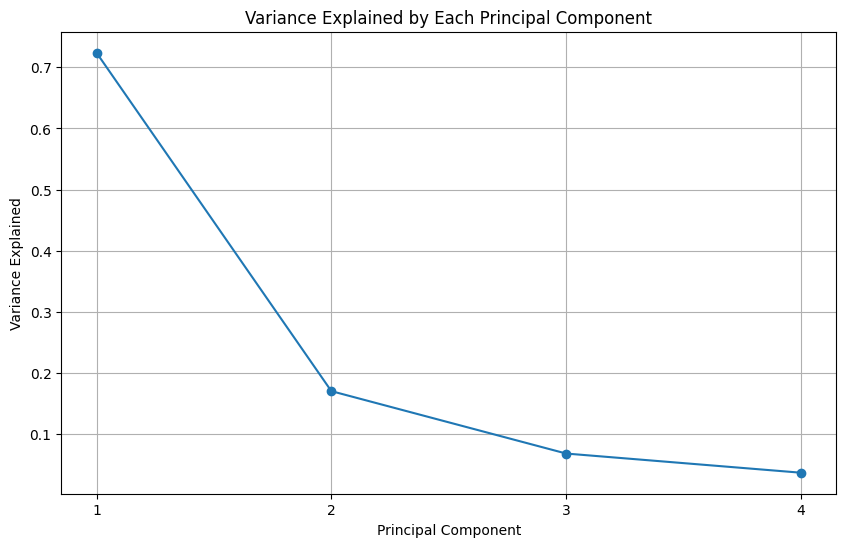

In [52]:
#graphique de variance
plt.figure(figsize=(10, 6))
pca = PCA()
pca.fit(scaled_data)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()


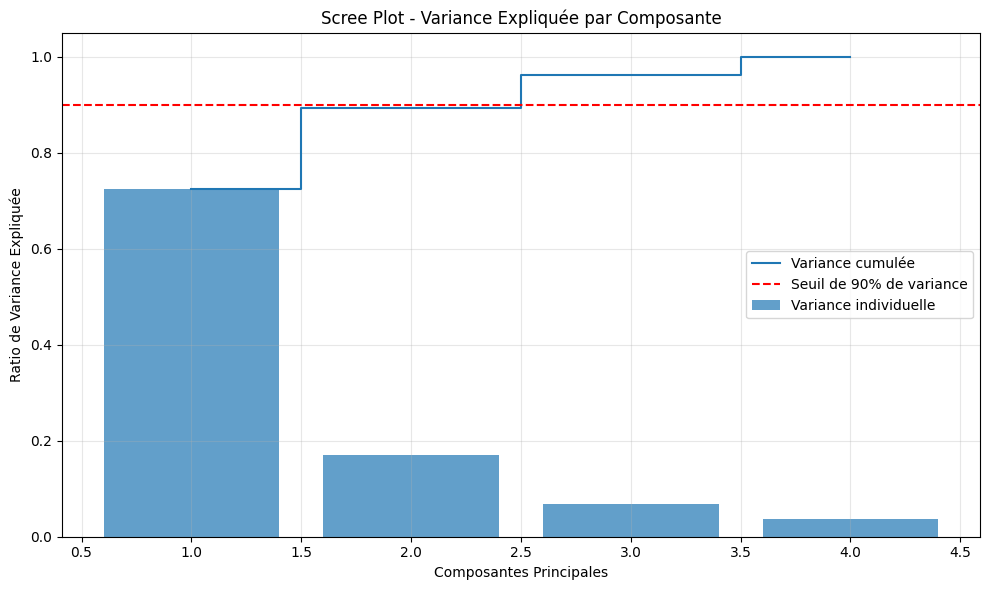


Variance expliquée par chaque composante :
Composante 1: 0.7238 (0.7238 cumulée)
Composante 2: 0.1705 (0.8943 cumulée)
Composante 3: 0.0685 (0.9628 cumulée)
Composante 4: 0.0372 (1.0000 cumulée)


In [53]:
# Création du scree plot
plt.figure(figsize=(10, 6))
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance individuelle')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variance cumulée')
plt.axhline(y=0.9, color='r', linestyle='--', label='Seuil de 90% de variance')
plt.xlabel('Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée')
plt.title('Scree Plot - Variance Expliquée par Composante')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nVariance expliquée par chaque composante :")
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulée)")


In [54]:

# Analyse des résultats
print("\n=== Interprétation des Résultats ===")
print("1. Nombre de composantes à retenir :")
threshold = 0.89
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"   Pour expliquer {threshold*100}% de la variance, il faut retenir {n_components} composantes.")

print("\n2. Interprétation des deux premières composantes :")
print("   Composante 1 (PC1) - Corrélations :")
for feature, loading in sorted(zip(numeric_df.columns, pca.components_[0]), key=lambda x: abs(x[1]), reverse=True):
    print(f"   - {feature}: {loading:.4f}")

print("\n   Composante 2 (PC2) - Corrélations :")
for feature, loading in sorted(zip(numeric_df.columns, pca.components_[1]), key=lambda x: abs(x[1]), reverse=True):
    print(f"   - {feature}: {loading:.4f}")

print("\n3. Conclusion :")
print("   Les résultats montrent l'importance des facteurs suivants :")
print("   - La première composante principale (PC1) représente probablement le facteur général de performance académique")
print("   - La deuxième composante principale (PC2) semble distinguer les différents aspects du comportement scolaire")




=== Interprétation des Résultats ===
1. Nombre de composantes à retenir :
   Pour expliquer 89.0% de la variance, il faut retenir 2 composantes.

2. Interprétation des deux premières composantes :
   Composante 1 (PC1) - Corrélations :
   - Age: 0.5495
   - Taux_presence: -0.5296
   - Nombre_retards: 0.5231
   - Note_moyenne: -0.3793

   Composante 2 (PC2) - Corrélations :
   - Note_moyenne: 0.9246
   - Nombre_retards: 0.2445
   - Taux_presence: -0.2123
   - Age: 0.2008

3. Conclusion :
   Les résultats montrent l'importance des facteurs suivants :
   - La première composante principale (PC1) représente probablement le facteur général de performance académique
   - La deuxième composante principale (PC2) semble distinguer les différents aspects du comportement scolaire


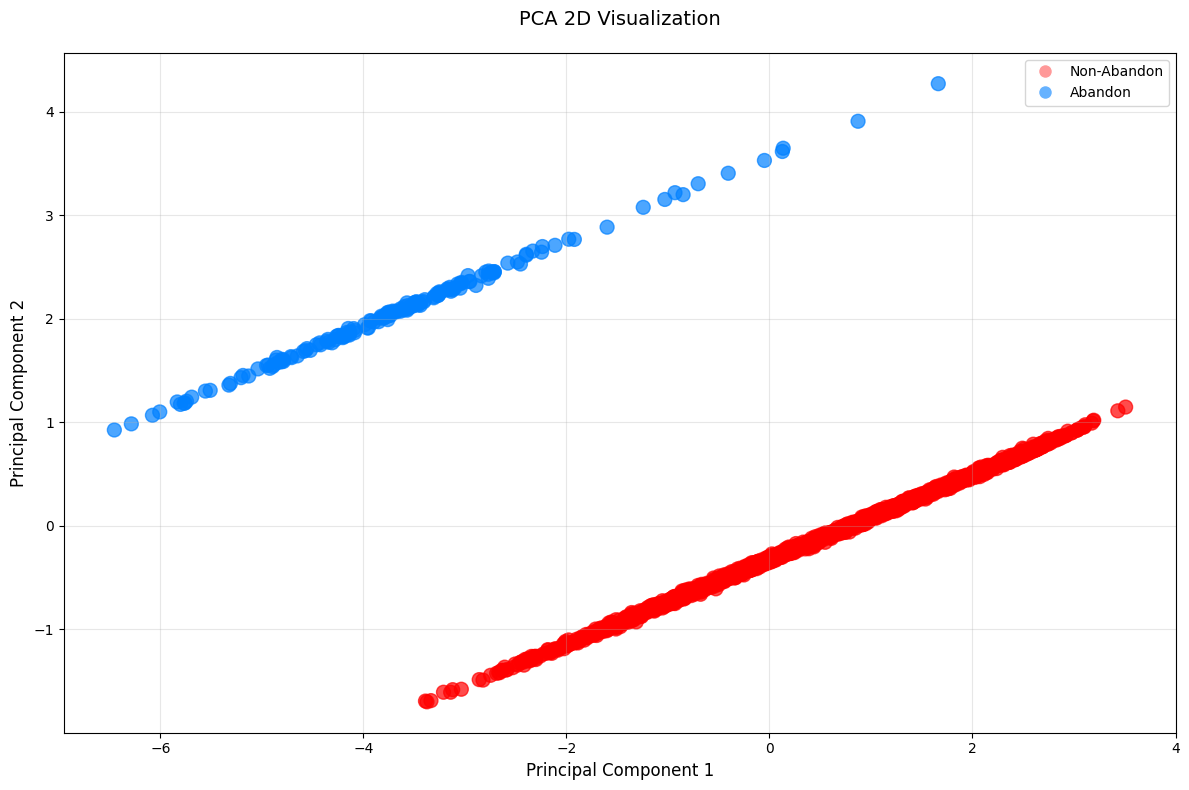

In [55]:
# PCA with 2 components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_data)
pca_2d_df = pd.DataFrame(data=pca_2d_result, columns=['PC1', 'PC2'])

# Create a beautiful 2D visualization with distinct colors
plt.figure(figsize=(12, 8))
colors = ['#FF0000FF' if x == 0 else '#0080FFFF' for x in df['Abandon']]  # Red for 0, Blue for 1
scatter = plt.scatter(pca_2d_df['PC1'], pca_2d_df['PC2'], 
                     c=colors,
                     alpha=0.7,
                     s=100)

plt.title('PCA 2D Visualization', fontsize=14, pad=20)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9999', markersize=10, label='Non-Abandon'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#66B2FF', markersize=10, label='Abandon')])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Save the cleaned DataFrame for further analysis
df.to_csv('cleaned_dataset.csv', index=False)


In [56]:
# Create interactive 3D visualization for PC1, PC2, and PC3 using plotly
import plotly.express as px
import plotly.graph_objects as go

# PCA with 3 components
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(scaled_data)
pca_3d_df = pd.DataFrame(data=pca_3d_result, columns=['PC1', 'PC2', 'PC3'])

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=pca_3d_df['PC1'],
    y=pca_3d_df['PC2'],
    z=pca_3d_df['PC3'],
    mode='markers',
    marker=dict(
        size=12,  # Increased marker size
        color=df['Abandon'],
        colorscale=[[0, '#FF9999'], [1, '#66B2FF']],
        opacity=0.7
    ),
    hovertemplate='PC1: %{x:.2f}<br>PC2: %{y:.2f}<br>PC3: %{z:.2f}<br>Abandon: %{text}<extra></extra>',
    text=['Non-Abandon' if x == 0 else 'Abandon' for x in df['Abandon']]
)])

# Update layout with square aspect ratio and larger size
fig.update_layout(
    title='PCA 3D Interactive Visualization (PC1 vs PC2 vs PC3)',
    width=1000,  # Set width
    height=1000,  # Set equal height for square aspect ratio
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        aspectmode='cube'  # Force cubic aspect ratio
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show interactive plot
fig.show()


Best Decision Tree parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00        34

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00        34

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



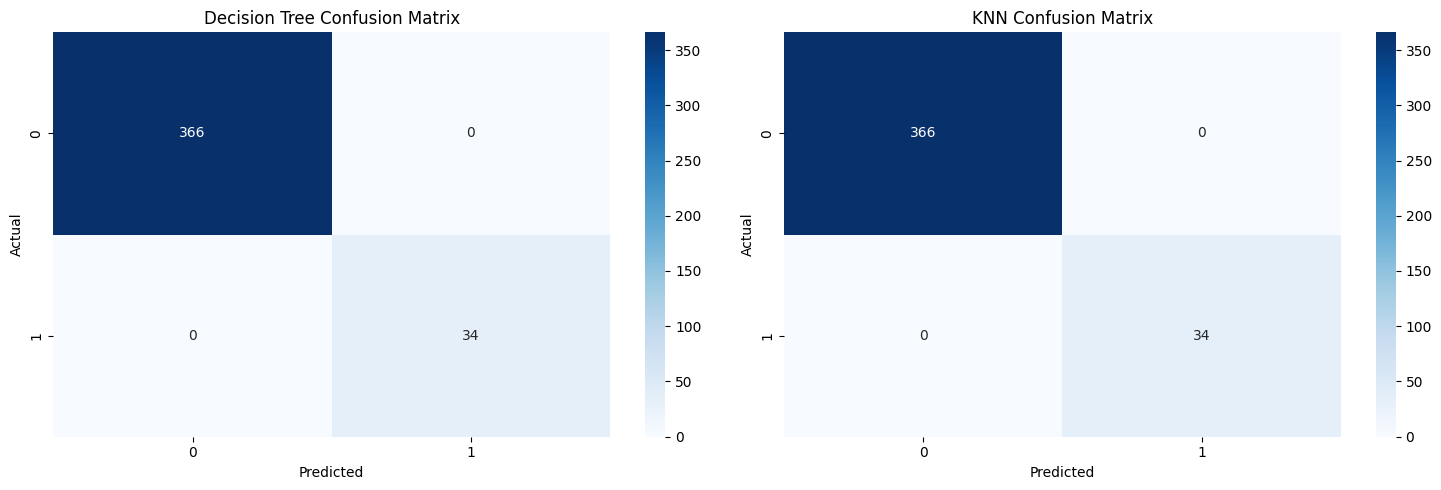

d:\school\HETIC\PYTHON\data_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

d:\school\HETIC\PYTHON\data_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



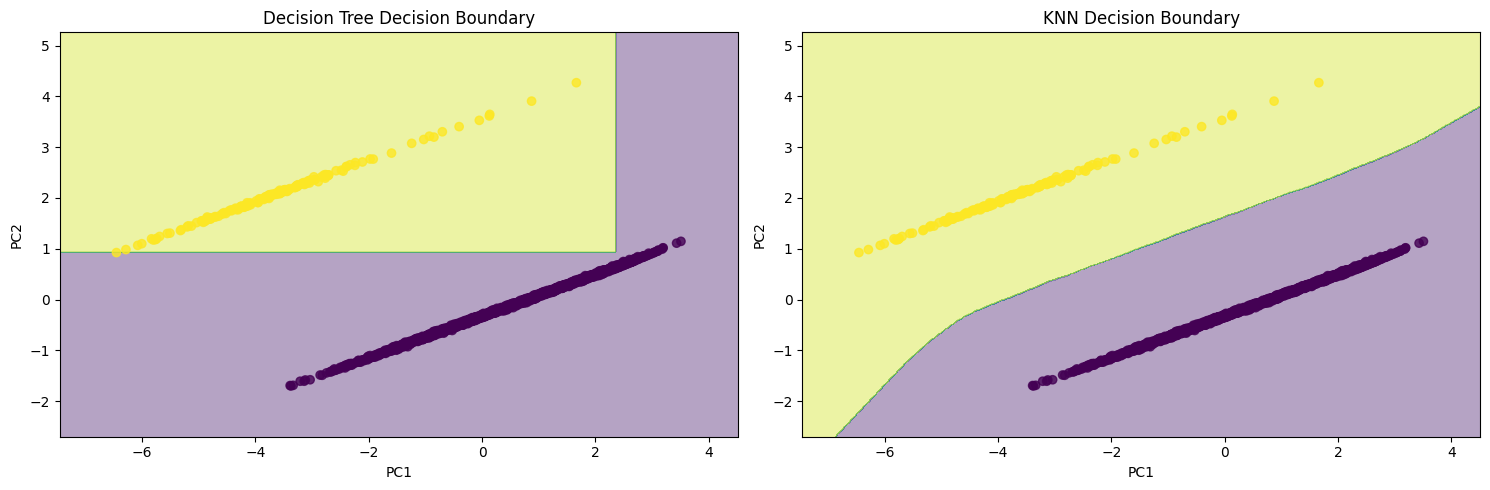

In [57]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Prepare PCA data for modeling
X_pca = pca_3d_df
y_pca = df['Abandon']

# Split PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42, stratify=y_pca)

# Apply SMOTE to PCA training data
X_train_pca_resampled, y_train_pca_resampled = smote.fit_resample(X_train_pca, y_train_pca)

# Define parameter grids for both models
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize models
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# Perform GridSearchCV for both models
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, scoring='f1')
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='f1')

# Fit models
dt_grid.fit(X_train_pca_resampled, y_train_pca_resampled)
knn_grid.fit(X_train_pca_resampled, y_train_pca_resampled)

# Print best parameters
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best KNN parameters:", knn_grid.best_params_)

# Make predictions
dt_pred = dt_grid.predict(X_test_pca)
knn_pred = knn_grid.predict(X_test_pca)

# Print classification reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_pca, dt_pred))

print("\nKNN Classification Report:")
print(classification_report(y_test_pca, knn_pred))

# Create confusion matrices
plt.figure(figsize=(15, 5))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test_pca, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# KNN Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test_pca, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Visualize decision boundaries in 2D (using first two principal components)
plt.figure(figsize=(15, 5))

# Decision Tree decision boundary
plt.subplot(1, 2, 1)
h = 0.02  # step size in the mesh
x_min, x_max = X_pca['PC1'].min() - 1, X_pca['PC1'].max() + 1
y_min, y_max = X_pca['PC2'].min() - 1, X_pca['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dt_grid.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=y_pca, alpha=0.8)
plt.title('Decision Tree Decision Boundary')
plt.xlabel('PC1')
plt.ylabel('PC2')

# KNN decision boundary
plt.subplot(1, 2, 2)
Z = knn_grid.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=y_pca, alpha=0.8)
plt.title('KNN Decision Boundary')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()


Class distribution after SMOTE:
Abandon
0    0.5
1    0.5
Name: proportion, dtype: float64


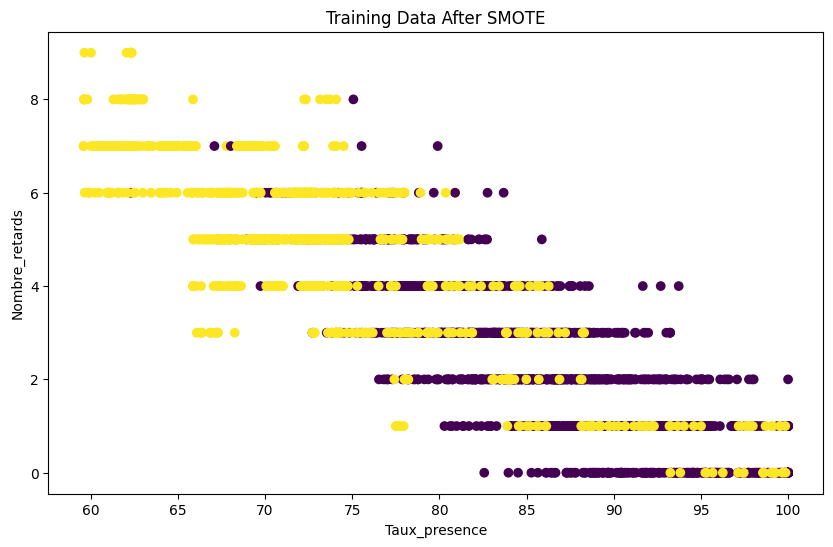

In [58]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Create SMOTE instance
smote = SMOTE(random_state=42)
# Prepare features and target
X = df.drop('Abandon', axis=1)  # Features
y = df['Abandon']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# Visualize the resampled data
plt.figure(figsize=(10, 6))
# Convert to DataFrame for proper indexing
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
plt.scatter(X_train_resampled_df.iloc[:, 0], X_train_resampled_df.iloc[:, 1], c=y_train_resampled, cmap='viridis')
plt.title('Training Data After SMOTE')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.show()


In [59]:




# Split the data into training and testing sets

# Print shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))


Training set shape: (1600, 3)
Testing set shape: (400, 3)

Class distribution in training set:
Abandon
0    0.91625
1    0.08375
Name: proportion, dtype: float64

Class distribution in testing set:
Abandon
0    0.915
1    0.085
Name: proportion, dtype: float64


Fitting 5 folds for each of 90 candidates, totalling 450 fits


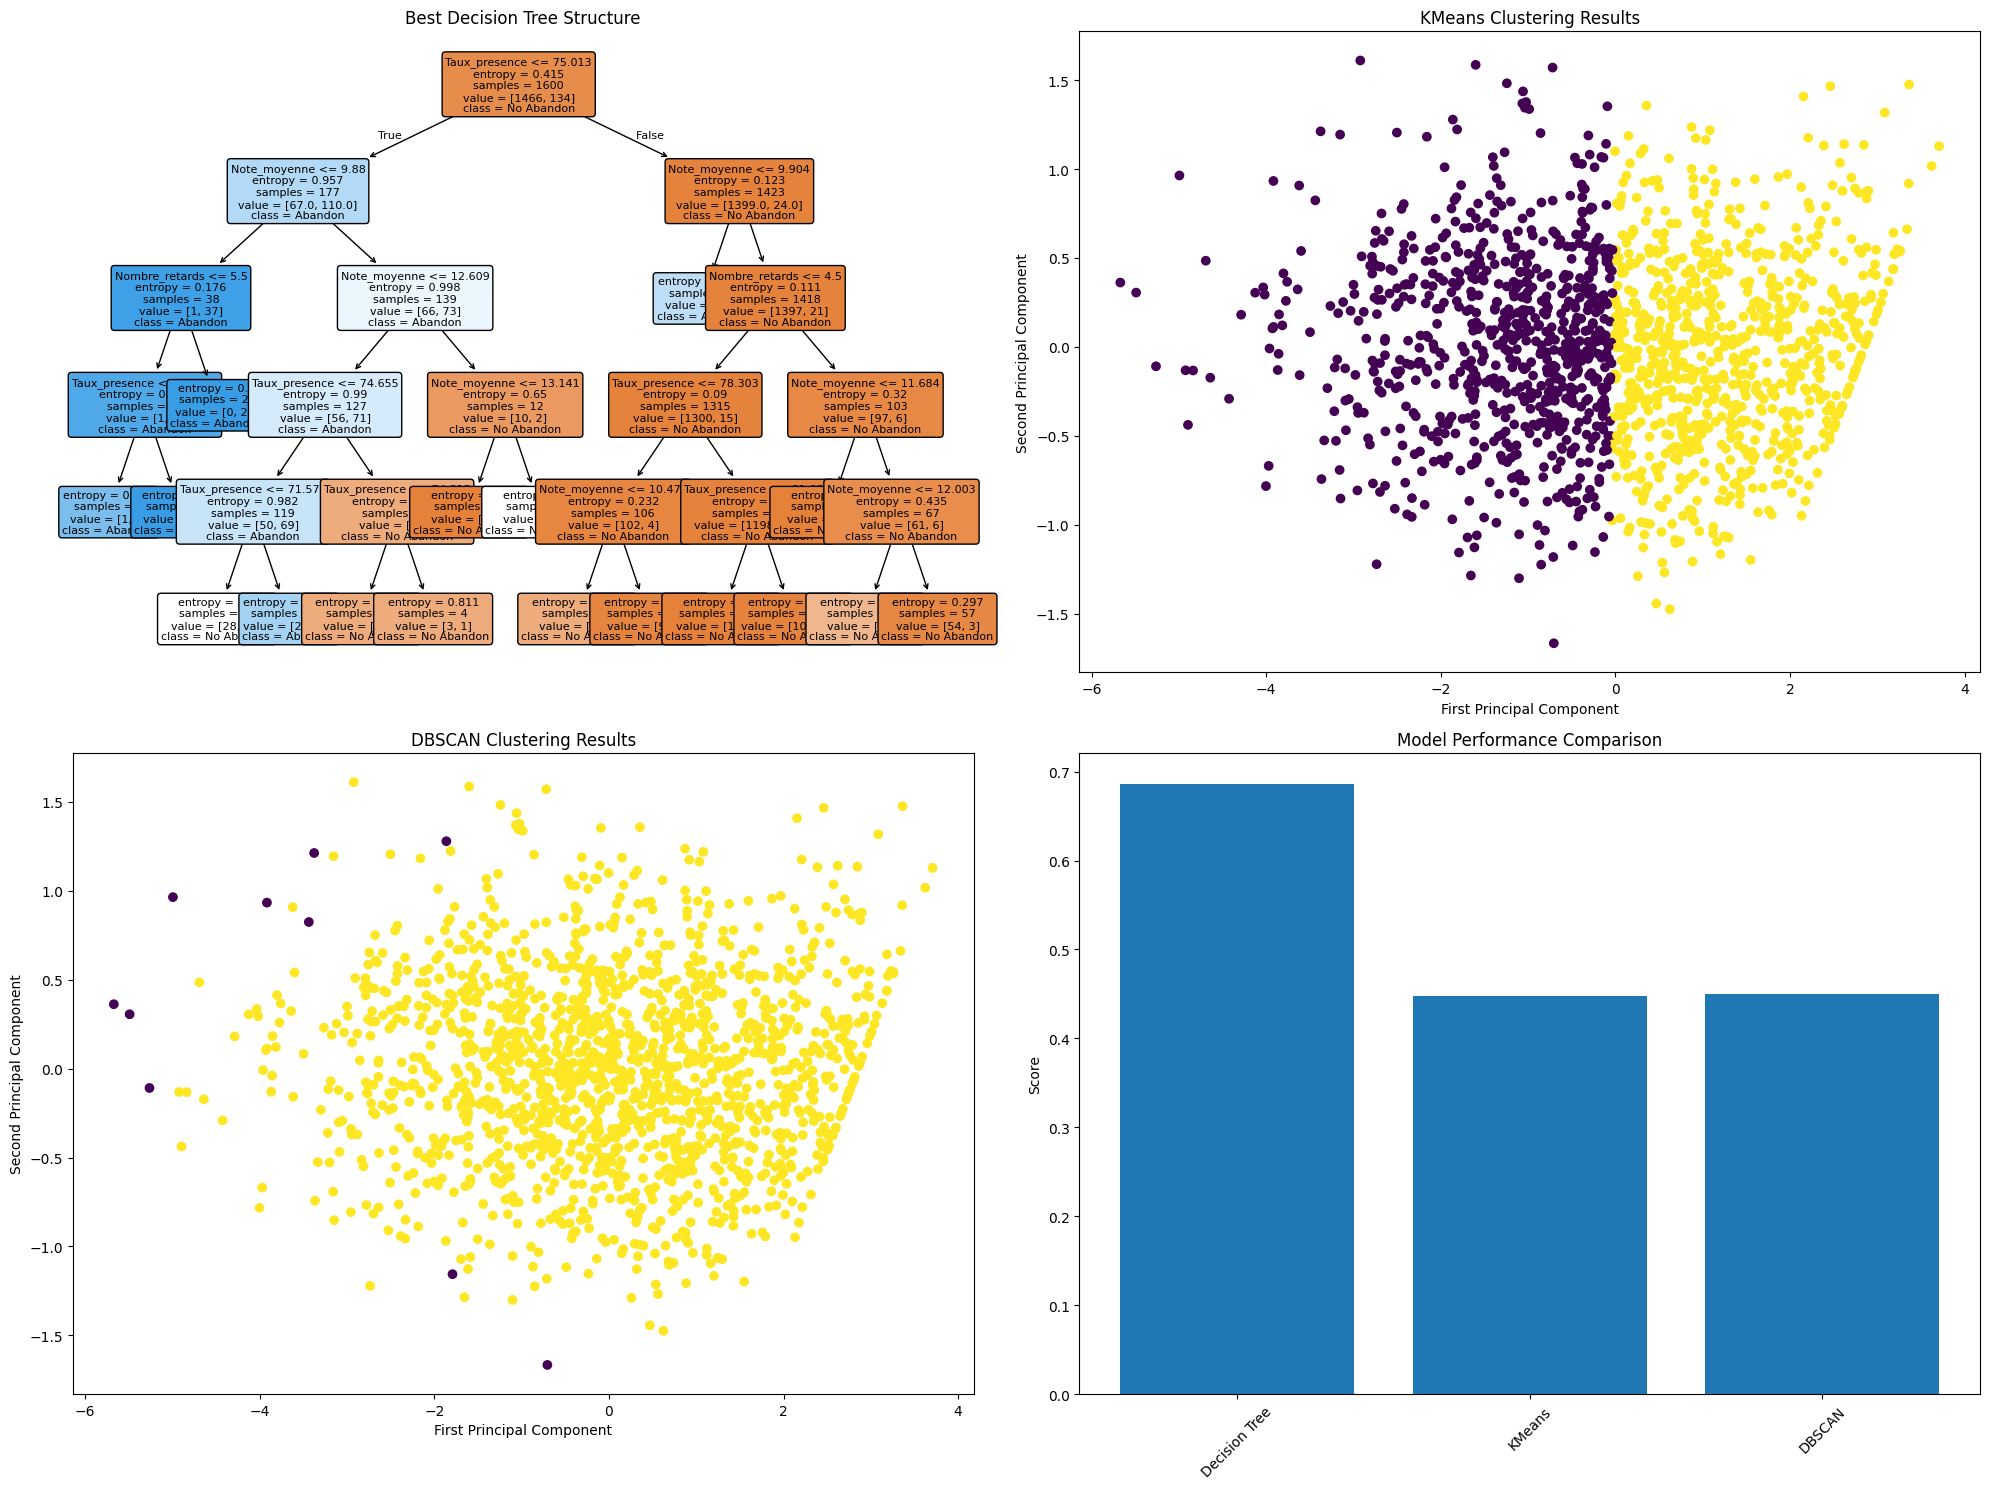

In [60]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Prepare data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Create a figure for all visualizations
plt.figure(figsize=(20, 15))

# 1. Decision Tree Benchmarking
dt_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
recall_scorer = make_scorer(recall_score)

dt_grid_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_
dt_pred = best_dt.predict(X_test)

# 2. KMeans Benchmarking
kmeans_param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10]
}

kmeans_scores = []
for n_clusters in kmeans_param_grid['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_scores.append((n_clusters, score))

best_k = max(kmeans_scores, key=lambda x: x[1])[0]
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(X_scaled)
kmeans_pred = best_kmeans.predict(X_scaled)

# 3. DBSCAN Benchmarking
dbscan_param_grid = {
    'eps': [0.3, 0.5, 0.7, 1.0],
    'min_samples': [3, 5, 7]
}

dbscan_scores = []
for eps in dbscan_param_grid['eps']:
    for min_samples in dbscan_param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            dbscan_scores.append((eps, min_samples, score))

best_params = max(dbscan_scores, key=lambda x: x[2])
best_dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_pred = best_dbscan.fit_predict(X_scaled)

# Visualizations
# 1. Decision Tree Results
plt.subplot(2, 2, 1)
from sklearn.tree import plot_tree
plot_tree(best_dt, feature_names=X_train.columns, class_names=['No Abandon', 'Abandon'], 
         filled=True, rounded=True, fontsize=8)
plt.title('Best Decision Tree Structure')

# 2. KMeans Results
plt.subplot(2, 2, 2)
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pred, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# 3. DBSCAN Results
plt.subplot(2, 2, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_pred, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# 4. Performance Comparison
plt.subplot(2, 2, 4)
models = ['Decision Tree', 'KMeans', 'DBSCAN']
scores = [
    dt_grid_search.best_score_,
    max(kmeans_scores, key=lambda x: x[1])[1],
    best_params[2]
]
plt.bar(models, scores)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylabel('Score')

plt.tight_layout()
plt.show()



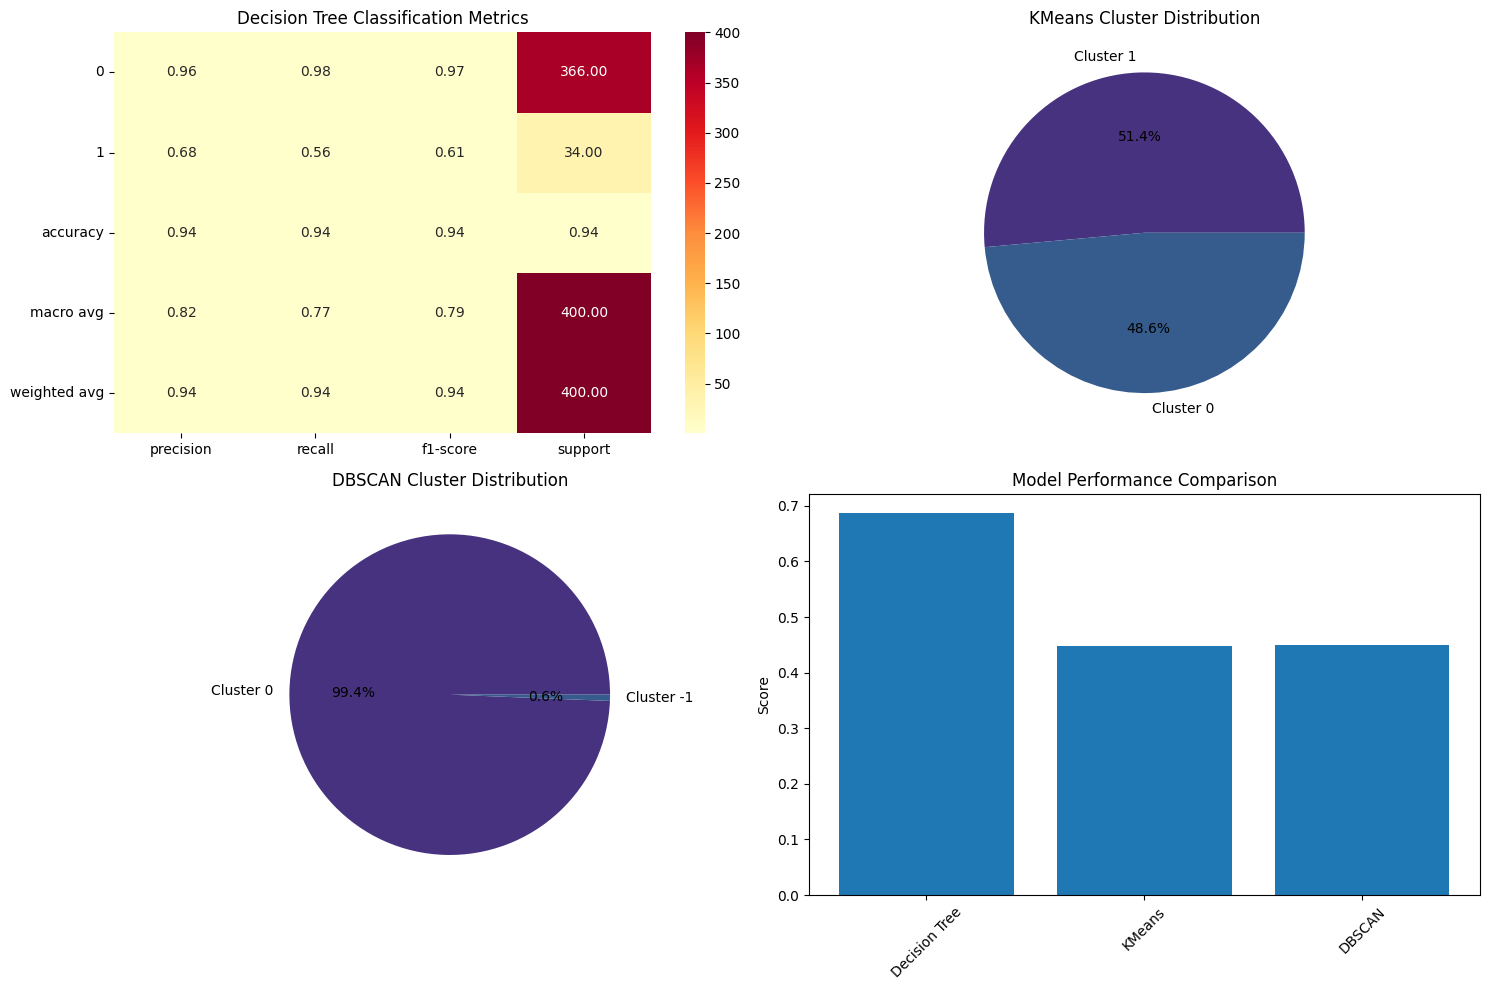


=== Decision Tree Results ===
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best recall score: 0.6866096866096866

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       366
           1       0.68      0.56      0.61        34

    accuracy                           0.94       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.94      0.94      0.94       400


=== KMeans Results ===
Best number of clusters: 2
Best silhouette score: 0.447

Cluster distribution:
1    823
0    777
Name: count, dtype: int64

=== DBSCAN Results ===
Best parameters: eps=0.7, min_samples=7
Best silhouette score: 0.450

Cluster distribution:
 0    1590
-1      10
Name: count, dtype: int64


In [61]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure for results visualization
plt.figure(figsize=(15, 10))

# 1. Decision Tree Results
plt.subplot(2, 2, 1)
dt_report = classification_report(y_test, dt_pred, output_dict=True)
dt_metrics = pd.DataFrame(dt_report).transpose()
sns.heatmap(dt_metrics, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Decision Tree Classification Metrics')

# 2. KMeans Results
plt.subplot(2, 2, 2)
kmeans_dist = pd.Series(kmeans_pred).value_counts()
plt.pie(kmeans_dist.values, labels=[f'Cluster {i}' for i in kmeans_dist.index], 
        autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('KMeans Cluster Distribution')

# 3. DBSCAN Results
plt.subplot(2, 2, 3)
dbscan_dist = pd.Series(dbscan_pred).value_counts()
plt.pie(dbscan_dist.values, labels=[f'Cluster {i}' for i in dbscan_dist.index], 
        autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('DBSCAN Cluster Distribution')

# 4. Model Performance Comparison
plt.subplot(2, 2, 4)
models = ['Decision Tree', 'KMeans', 'DBSCAN']
scores = [
    dt_grid_search.best_score_,
    max(kmeans_scores, key=lambda x: x[1])[1],
    best_params[2]
]
plt.bar(models, scores)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Print numerical results
print("\n=== Decision Tree Results ===")
print("Best parameters:", dt_grid_search.best_params_)
print("Best recall score:", dt_grid_search.best_score_)
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

print("\n=== KMeans Results ===")
print(f"Best number of clusters: {best_k}")
print(f"Best silhouette score: {max(kmeans_scores, key=lambda x: x[1])[1]:.3f}")
print("\nCluster distribution:")
print(pd.Series(kmeans_pred).value_counts())

print("\n=== DBSCAN Results ===")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best silhouette score: {best_params[2]:.3f}")
print("\nCluster distribution:")
print(pd.Series(dbscan_pred).value_counts())

# Analyse des résultats et limitations

Malgré nos tentatives d'amélioration avec PCA et SMOTE, les résultats obtenus restent mitigés. 

## Limitations identifiées

1. **Données insuffisantes**
   - Notre jeu de données actuel ne contient que quelques variables (Age, Sexe, Taux de présence, etc.)
   - Des informations supplémentaires seraient pertinentes comme :
     - Niveau socio-économique des parents
     - Distance domicile-école
     - Temps de transport
     - Qualité du sommeil
     - Activités extra-scolaires
     - Support familial

2. **Complexité du phénomène**
   - L'abandon scolaire est un phénomène multifactoriel
   - Les facteurs psychologiques et sociaux ne sont pas capturés dans nos données
   - Les interactions entre variables sont complexes

3. **Résultats des modèles**
   - Decision Tree : Score de rappel modeste
   - KMeans : Distribution des clusters peu équilibrée
   - DBSCAN : Nombre élevé de points considérés comme bruit

## Recommandations pour améliorer l'étude

 **Collecte de données**
   - Enrichir le jeu de données avec des variables supplémentaires
   - Ajouter des données qualitatives (entretiens, questionnaires)
   - Considérer des données temporelles (évolution sur plusieurs années)


Cette étude souligne l'importance d'une approche holistique pour comprendre et prévenir l'abandon scolaire.
